
4.) Build three classifiers (logistic, KNN, neural net) for the Wisconsin breast cancer data set

(https://scikit-learn.org/stable/datasets/toy_dataset.html)

And then use an ensemble method to combine the three predictors. Determine the accuracy and AUC for each method alone and then for the ensemble. Use SHAP to explain what the ensemble is doing.

Turn in a notebook showing this

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()



In [5]:
list(data.target_names)


['malignant', 'benign']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
X=data.data

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
y=data.target

Nural Net

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, batch_size=int(min(200/2, X.shape[0]/2)),max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)

clf.fit(X, y)

Iteration 1, loss = 12.08760684
Iteration 2, loss = 9.11703601
Iteration 3, loss = 8.41092312
Iteration 4, loss = 7.74197887
Iteration 5, loss = 7.06935370
Iteration 6, loss = 5.89548259
Iteration 7, loss = 5.00092453
Iteration 8, loss = 4.09719920
Iteration 9, loss = 3.27987110
Iteration 10, loss = 2.65784461
Iteration 11, loss = 1.99870944
Iteration 12, loss = 1.47442610
Iteration 13, loss = 1.05003995
Iteration 14, loss = 0.76221798
Iteration 15, loss = 0.62428151
Iteration 16, loss = 0.46398279
Iteration 17, loss = 0.39621035
Iteration 18, loss = 0.34337458
Iteration 19, loss = 0.33018723
Iteration 20, loss = 0.30425916
Iteration 21, loss = 0.30478458
Iteration 22, loss = 0.29303265
Iteration 23, loss = 0.29091977
Iteration 24, loss = 0.29448245
Iteration 25, loss = 0.28713521
Iteration 26, loss = 0.28744732
Iteration 27, loss = 0.27176965
Iteration 28, loss = 0.27096705
Iteration 29, loss = 0.26108145
Iteration 30, loss = 0.25977290
Iteration 31, loss = 0.25869470
Iteration 32, lo

MLPClassifier(alpha=1e-05, batch_size=100, hidden_layer_sizes=(13, 6),
              max_iter=500, random_state=1, verbose=True)

KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNNclf = KNeighborsClassifier(n_neighbors=2,weights='uniform',p=1)

clf.fit(X, y)

Iteration 1, loss = 12.08760684
Iteration 2, loss = 9.11703601
Iteration 3, loss = 8.41092312
Iteration 4, loss = 7.74197887
Iteration 5, loss = 7.06935370
Iteration 6, loss = 5.89548259
Iteration 7, loss = 5.00092453
Iteration 8, loss = 4.09719920
Iteration 9, loss = 3.27987110
Iteration 10, loss = 2.65784461
Iteration 11, loss = 1.99870944
Iteration 12, loss = 1.47442610
Iteration 13, loss = 1.05003995
Iteration 14, loss = 0.76221798
Iteration 15, loss = 0.62428151
Iteration 16, loss = 0.46398279
Iteration 17, loss = 0.39621035
Iteration 18, loss = 0.34337458
Iteration 19, loss = 0.33018723
Iteration 20, loss = 0.30425916
Iteration 21, loss = 0.30478458
Iteration 22, loss = 0.29303265
Iteration 23, loss = 0.29091977
Iteration 24, loss = 0.29448245
Iteration 25, loss = 0.28713521
Iteration 26, loss = 0.28744732
Iteration 27, loss = 0.27176965
Iteration 28, loss = 0.27096705
Iteration 29, loss = 0.26108145
Iteration 30, loss = 0.25977290
Iteration 31, loss = 0.25869470
Iteration 32, lo

MLPClassifier(alpha=1e-05, batch_size=100, hidden_layer_sizes=(13, 6),
              max_iter=500, random_state=1, verbose=True)

logistic

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [21]:
clf_ML = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=4000,hidden_layer_sizes=(13,6,3,), warm_start=False)

clf_neigh = KNeighborsClassifier(n_neighbors=2)

log_clf = LogisticRegression(max_iter=3000)

Hard Voting

In [22]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('ML', clf_ML), ('KNN', clf_neigh)],
    voting='hard')

voting_clf.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=3000)),
                             ('ML',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(13, 6, 3),
                                            max_iter=4000, random_state=1)),
                             ('KNN', KNeighborsClassifier(n_neighbors=2))])

In [23]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, clf_neigh, clf_ML, voting_clf):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(clf.__class__.__name__, accuracy_score(y, y_pred))

LogisticRegression 0.9578207381370826
KNeighborsClassifier 0.968365553602812
MLPClassifier 0.9244288224956063
VotingClassifier 0.961335676625659


Soft Voting

In [24]:
voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf), ('ML', clf_ML), ('KNN', clf_neigh)],
    voting='soft')

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [33]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
for clf in (log_clf, clf_neigh, clf_ML, voting_clf2):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(clf.__class__.__name__, "The accucary : ",accuracy_score(y, y_pred),"The AUC",roc_auc_score(y, y_pred))

LogisticRegression The accucary :  0.9578207381370826 The AUC 0.9520175994926273
KNeighborsClassifier The accucary :  0.968365553602812 The AUC 0.9747899159663865
MLPClassifier The accucary :  0.9244288224956063 The AUC 0.9119959304476508
VotingClassifier The accucary :  0.9648506151142355 The AUC 0.9566619100470377


accuracy and AUC

In [34]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.5 MB/s eta 0:00:00


In [35]:
# ipywidgets

!pip install ipywidgets

# this will allow the notebook to reload/refresh automatically within the runtime
%reload_ext autoreload
%autoreload 2

import ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.7 MB/s eta 0:00:00


In [36]:
import shap

In [37]:
explainer = shap.PermutationExplainer(voting_clf2.predict,X)

In [38]:
shap_values = explainer.shap_values(X)

PermutationExplainer explainer: 570it [03:49,  2.41it/s]


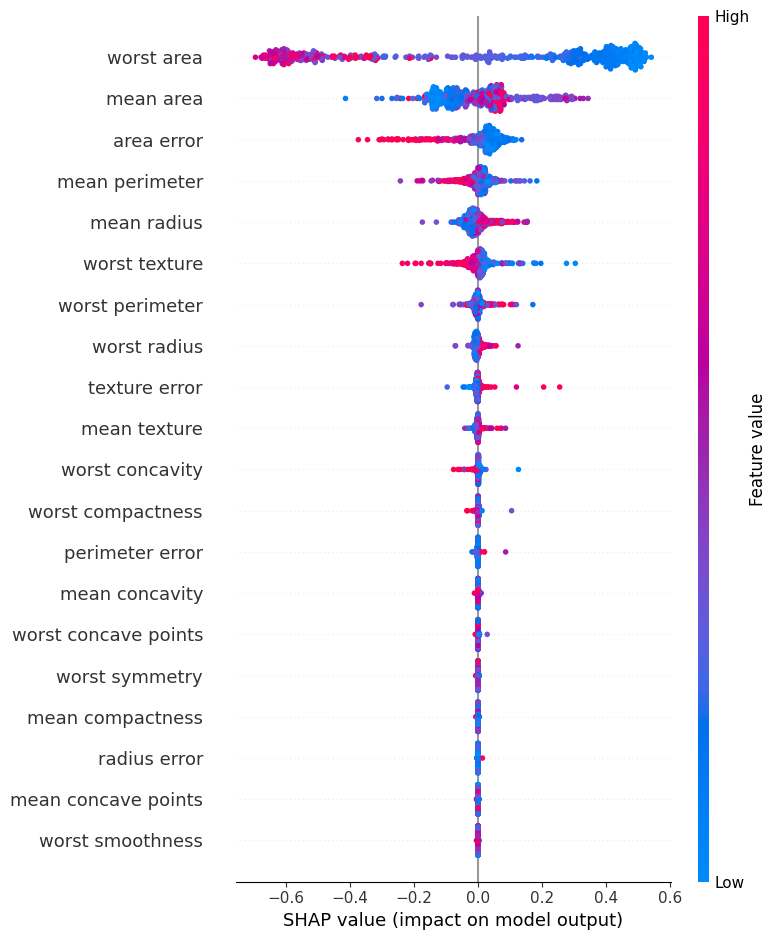

In [40]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))

shap.summary_plot(shap_values,X,feature_names=data.feature_names)

for the top 3 features that impact the model: Low "worst area" and "area error" values increases shap value while high value decrease shap value. Mean area seems to have the opposite effect.